Python Code_Part 2

In [1]:
# install package
%pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv and put it into a dataframe. Have a look at the dataframe. 

In [3]:
df = pd.read_csv('clean_kaggle_data_2021.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,284,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,"0-9,999"


# 1. Data Cleaning

In order to perform data cleaning, we first need to see how many null values are there in the dataframe.

In [4]:
# See how many null values are in each column
df.isnull().sum(axis=0)

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_10                          14089
Q38_B_Part_11                          12880
Q38_B_OTHER                            15177
Q25_Encoded                                1
Q25_buckets                                1
Length: 371, dtype: int64

Since there are lots of columns with so many missing values, even if they are because of the multiple choices involved in the survey results which divides each question answer into every single part, it also indicates if a single part has so many missing values, it would be less relevant to our survey results, thus since there are 15391 participants results, we dropped the columns with more than 10000 missing values. 

In [5]:
# drop columns with too many NAs
df = df.dropna(thresh=len(df) - 10000, axis=1)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_3,Q8,...,Q36_A_Part_7,Q38_A_Part_11,Q40_Part_1,Q40_Part_3,Q41,Q42_Part_4,Q42_Part_6,Q42_Part_8,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Do you use any automated machine learning tool...,Do you use any tools to help manage machine le...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,NaN,Python,...,No / None,No / None,Coursera,Kaggle Learn Courses,"Local development environments (RStudio, Jupyt...","Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,SQL,Python,...,NaN,NaN,NaN,Kaggle Learn Courses,"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,Python,...,No / None,No / None,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,Python,...,NaN,NaN,Coursera,NaN,"Local development environments (RStudio, Jupyt...",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,SQL,Python,...,No / None,No / None,NaN,Kaggle Learn Courses,"Cloud-based data software & APIs (AWS, GCP, Az...","Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,SQL,Python,...,No / None,NaN,Coursera,Kaggle Learn Courses,"Business intelligence software (Salesforce, Ta...","Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,Coursera,NaN,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,0.0,"0-9,999"


Below are the column names of all the remaining columns.

In [6]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_3', 'Q8', 'Q9_Part_4', 'Q9_Part_11',
       'Q10_Part_1', 'Q10_Part_2', 'Q11', 'Q12_Part_5', 'Q13', 'Q14_Part_1',
       'Q14_Part_2', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q17_Part_1',
       'Q17_Part_2', 'Q17_Part_3', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24_Part_1',
       'Q25', 'Q26', 'Q31_A_Part_9', 'Q36_A_Part_7', 'Q38_A_Part_11',
       'Q40_Part_1', 'Q40_Part_3', 'Q41', 'Q42_Part_4', 'Q42_Part_6',
       'Q42_Part_8', 'Q25_Encoded', 'Q25_buckets'],
      dtype='object')

Among these columns, there are some columns that are categorical but not ordinal. All the multiple choices ones which have different Parts displayed and only shows whether participants have selected the choice or not are belongs to these categories. Therefore, we encoded them using dummy variables. 

In [7]:
# columns not to transform
not_cols = ['Time from Start to Finish (seconds)','Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21','Q22','Q23','Q25','Q26','Q41','Q25_Encoded','Q25_buckets']
# columns to put in dummies
col = [col for col in df.columns if col not in not_cols]
# new dataframe with dummies
df_with_dummies = pd.get_dummies(data=df[1:], columns=col)
df_with_dummies

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,...,"Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)",Q24_Part_1_Analyze and understand data to influence product or business decisions,Q31_A_Part_9_No / None,Q36_A_Part_7_No / None,Q38_A_Part_11_No / None,Q40_Part_1_Coursera,Q40_Part_3_Kaggle Learn Courses,"Q42_Part_4_Kaggle (notebooks, forums, etc)","Q42_Part_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q42_Part_8_Blogs (Towards Data Science, Analytics Vidhya, etc)"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,1,0,1,1,1,1,1,1,1,1
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,0,0,0,0,0,0,1,0,0,0
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,...,0,0,0,1,1,0,0,1,1,0
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,...,0,0,0,0,0,1,0,0,1,1
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Once,...,0,0,0,0,0,0,0,0,0,0
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,A personal computer / desktop,2-5 times,...,1,0,1,1,1,0,1,1,1,0
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Never,...,1,1,0,1,0,1,1,1,1,0
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


Below are the columns not encoded in dummy along with the number of their missing values. 

In [8]:
df_no_dummy = df[not_cols]
df_no_dummy.isnull().sum(axis=0)

Time from Start to Finish (seconds)       0
Q1                                        0
Q2                                        0
Q3                                        0
Q4                                        0
Q5                                        0
Q6                                        0
Q8                                      961
Q11                                     961
Q13                                     961
Q15                                     961
Q20                                       0
Q21                                       0
Q22                                       0
Q23                                       0
Q25                                       0
Q26                                     208
Q41                                    1965
Q25_Encoded                               1
Q25_buckets                               1
dtype: int64

From the number of missing values in each columns above, we could see that for Q8, Q11, Q13 and Q15, the numbers of missing values are all the same. We would like t know whether the same group of participants did not answer these questions. So we try to drop the participants who have missing values in Q8 first, to see how this would change other questions. 

In [9]:
df_no_dummy_1 = df_no_dummy.drop(index = df_no_dummy[df_no_dummy['Q8'].isna()].index)
df_no_dummy_1.isnull().sum(axis=0)

Time from Start to Finish (seconds)       0
Q1                                        0
Q2                                        0
Q3                                        0
Q4                                        0
Q5                                        0
Q6                                        0
Q8                                        0
Q11                                       0
Q13                                       0
Q15                                       0
Q20                                       0
Q21                                       0
Q22                                       0
Q23                                       0
Q25                                       0
Q26                                     204
Q41                                    1627
Q25_Encoded                               1
Q25_buckets                               1
dtype: int64

From the results above, we could see that after we drop participants who do not answer Q8, the number of missing values in Q11, Q13 and 15 become zero as well, therefore, we could know that the same group of people did not answer these questions. Then we proceed to drop these group of participants' result from the dataframe.

In [10]:
df_with_dummies = df_with_dummies.drop(index = df_with_dummies[df_with_dummies['Q8'].isna()].index)
df_with_dummies

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,...,"Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)",Q24_Part_1_Analyze and understand data to influence product or business decisions,Q31_A_Part_9_No / None,Q36_A_Part_7_No / None,Q38_A_Part_11_No / None,Q40_Part_1_Coursera,Q40_Part_3_Kaggle Learn Courses,"Q42_Part_4_Kaggle (notebooks, forums, etc)","Q42_Part_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q42_Part_8_Blogs (Towards Data Science, Analytics Vidhya, etc)"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,1,0,1,1,1,1,1,1,1,1
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,0,0,0,0,0,0,1,0,0,0
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,...,0,0,0,1,1,0,0,1,1,0
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,...,0,0,0,0,0,1,0,0,1,1
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15385,371,18-21,Man,India,Bachelor’s degree,Software Engineer,1-3 years,Python,A laptop,Never,...,0,1,0,0,0,0,0,1,0,1
15386,1898,60-69,Man,United States of America,Bachelor’s degree,Program/Project Manager,20+ years,Python,A personal computer / desktop,Never,...,1,1,1,1,1,1,0,1,0,1
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Once,...,0,0,0,0,0,0,0,0,0,0
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,A personal computer / desktop,2-5 times,...,1,0,1,1,1,0,1,1,1,0


After this, we are still concerned whether there are participants that have many columns not answered, and now since we still have 42 columns, rows which has above 10 nulls are droped from the dataframe. 

In [11]:
# drop rows above a certain number of nulls
df_with_dummies.dropna(axis=0, how='any', thresh=10, subset=None, inplace=True)

Below is the remaining number of missing values in different columns:

In [12]:
df_with_dummies.isnull().sum(axis=0)

Time from Start to Finish (seconds)                                                     0
Q1                                                                                      0
Q2                                                                                      0
Q3                                                                                      0
Q4                                                                                      0
Q5                                                                                      0
Q6                                                                                      0
Q8                                                                                      0
Q11                                                                                     0
Q13                                                                                     0
Q15                                                                                     0
Q20       

There are still 204 missing values in Q26 and 1627 missing values in Q41. We start with Q26.

Q26. Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

We first look at how the choices are distributed in this question.

In [13]:
# distribution in different categories
df_with_dummies['Q26'].value_counts(normalize=True)

$0 ($USD)                  0.375721
$100-$999                  0.169970
$1000-$9,999               0.168143
$1-$99                     0.127654
$10,000-$99,999            0.089414
$100,000 or more ($USD)    0.069099
Name: Q26, dtype: float64

In [14]:
df_with_dummies['Q26'].describe()

count         14226
unique            6
top       $0 ($USD)
freq           5345
Name: Q26, dtype: object

In [15]:
# number of missing values in Q26
print('Number of NA in Q26:',df_with_dummies['Q26'].isna().sum())

Number of NA in Q26: 204


From the distribution above, about 38% participants chooses $0 option and no other option has the same large amount as this. Since the missing values are only 204, which is not large, the mode is used to fill in these missing numbers. 

In [16]:
df_with_dummies['Q26'].fillna(df_with_dummies['Q26'].mode()[0],inplace=True)

Then we look at Q41.

Q41. What is the primary tool that you use at work or school to analyze data? (Include text response)


We first look at how the choices are distributed in this question.

In [17]:
# distribution in different categories
df_with_dummies['Q41'].value_counts(normalize=True)

Local development environments (RStudio, JupyterLab, etc.)              0.397954
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.356245
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.074358
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.064047
Other                                                                   0.053737
Advanced statistical software (SPSS, SAS, etc.)                         0.053659
Name: Q41, dtype: float64

In [18]:
df_with_dummies['Q41'].describe()

count                                                 12803
unique                                                    6
top       Local development environments (RStudio, Jupyt...
freq                                                   5095
Name: Q41, dtype: object

In [19]:
# number of missing values in Q41
print('Number of NA in Q41:',df_with_dummies['Q41'].isna().sum())

Number of NA in Q41: 1627


From the distribution of the choice, nearly 40% of participants chose the option of 'Local development environments (RStudio, JupyterLab, etc.)'. Since the number of missing values is 1627, which is not a very large portion of the participants and thus the mode could be a useful information to reflect this group, therefore, missing values are filled in with mode.  

In [20]:
# fill in missing value with mode
df_with_dummies['Q41'].fillna(df_with_dummies['Q41'].mode()[0],inplace=True)

The first column which is 'Time from Start to Finish (seconds)' is not relevant to our study question of the amount of current yearly compensation, we remove this column from the dataframe. In addtion, since Q25_Encoded is included in the dataframe and what we need to do in this section is encoding, so Q25_Encoded is used as the target, while Q25 and Q25_buckets are removed from the dataframe, and now there are no missing values in each column.

In [21]:
# remove columns
df_with_dummies.drop('Time from Start to Finish (seconds)', axis=1, inplace=True)
df_with_dummies.drop('Q25', axis=1, inplace=True)
df_with_dummies.drop('Q25_buckets', axis=1, inplace=True)
# missing number in each columns
print(df_with_dummies.isna().sum())

Q1                                                                                   0
Q2                                                                                   0
Q3                                                                                   0
Q4                                                                                   0
Q5                                                                                   0
Q6                                                                                   0
Q8                                                                                   0
Q11                                                                                  0
Q13                                                                                  0
Q15                                                                                  0
Q20                                                                                  0
Q21                                        

Next we proceed to encode the other columns which need encoding. Since Q25 has already been encoded, and multiple choices questions are encoded with dummies, we only need to encode the rest columns which include: Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41. Ordinal encoding is used because there are many different levels involved in these questions and each level of choice are unique and have certain order when it relates to the final study question of compensation. 

Q1, Q4, Q5, Q6, Q13, Q15, Q21, Q22, Q23, Q26 and Q41 are clearly ordinal, so ordinal encoding is applied to them. For Q2, Q3, Q8, Q11and Q20 although they are not clearly ordinal, their different options do have certain order when related to compensation. For example, for Q3, the country reside is relevant to salary bucket because developed countries may have higher salary comparing to developing countries, therefore, these columns are also encoded using ordinal encoding.

The dataframe after data cleaning has been performed is shown below. 

In [22]:
# ordinal encoding
ordinal_encoder = OrdinalEncoder()
df_with_dummies[['Q1']] = ordinal_encoder.fit_transform(df_with_dummies[['Q1']])
df_with_dummies[['Q2']] = ordinal_encoder.fit_transform(df_with_dummies[['Q2']])
df_with_dummies[['Q3']] = ordinal_encoder.fit_transform(df_with_dummies[['Q3']])
df_with_dummies[['Q4']] = ordinal_encoder.fit_transform(df_with_dummies[['Q4']])
df_with_dummies[['Q5']] = ordinal_encoder.fit_transform(df_with_dummies[['Q5']])
df_with_dummies[['Q6']] = ordinal_encoder.fit_transform(df_with_dummies[['Q6']])
df_with_dummies[['Q8']] = ordinal_encoder.fit_transform(df_with_dummies[['Q8']])
df_with_dummies[['Q11']] = ordinal_encoder.fit_transform(df_with_dummies[['Q11']])
df_with_dummies[['Q13']] = ordinal_encoder.fit_transform(df_with_dummies[['Q13']])
df_with_dummies[['Q15']] = ordinal_encoder.fit_transform(df_with_dummies[['Q15']])
df_with_dummies[['Q20']] = ordinal_encoder.fit_transform(df_with_dummies[['Q20']])
df_with_dummies[['Q21']] = ordinal_encoder.fit_transform(df_with_dummies[['Q21']])
df_with_dummies[['Q22']] = ordinal_encoder.fit_transform(df_with_dummies[['Q22']])
df_with_dummies[['Q23']] = ordinal_encoder.fit_transform(df_with_dummies[['Q23']])
df_with_dummies[['Q26']] = ordinal_encoder.fit_transform(df_with_dummies[['Q26']])
df_with_dummies[['Q41']] = ordinal_encoder.fit_transform(df_with_dummies[['Q41']])
# dataframe after data cleaning
df_clean = df_with_dummies
df_clean

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,...,"Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)",Q24_Part_1_Analyze and understand data to influence product or business decisions,Q31_A_Part_9_No / None,Q36_A_Part_7_No / None,Q38_A_Part_11_No / None,Q40_Part_1_Coursera,Q40_Part_3_Kaggle Learn Courses,"Q42_Part_4_Kaggle (notebooks, forums, etc)","Q42_Part_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q42_Part_8_Blogs (Towards Data Science, Analytics Vidhya, etc)"
1,7.0,0.0,23.0,0.0,7.0,4.0,9.0,2.0,0.0,6.0,...,1,0,1,1,1,1,1,1,1,1
2,7.0,0.0,24.0,3.0,9.0,2.0,9.0,0.0,3.0,8.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.0,41.0,3.0,11.0,0.0,9.0,2.0,3.0,7.0,...,0,0,0,1,1,0,0,1,1,0
4,6.0,0.0,34.0,1.0,10.0,2.0,9.0,0.0,2.0,6.0,...,0,0,0,0,0,1,0,0,1,1
5,6.0,0.0,23.0,1.0,7.0,5.0,9.0,0.0,3.0,1.0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15385,0.0,0.0,23.0,0.0,11.0,0.0,9.0,2.0,3.0,8.0,...,0,1,0,0,0,0,0,1,0,1
15386,9.0,0.0,64.0,0.0,9.0,2.0,9.0,3.0,3.0,8.0,...,1,1,1,1,1,1,0,1,0,1
15387,3.0,0.0,23.0,0.0,2.0,0.0,9.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15388,4.0,0.0,51.0,0.0,11.0,4.0,9.0,3.0,0.0,4.0,...,1,0,1,1,1,0,1,1,1,0


# 2 Exploratory Data Analysis & Feature Selection

Below are the columns included in current dataframe:

In [23]:
df_clean.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13', 'Q15', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q26', 'Q41', 'Q25_Encoded', 'Q7_Part_1_Python',
       'Q7_Part_3_SQL', 'Q9_Part_4_ Visual Studio Code (VSCode) ',
       'Q9_Part_11_ Jupyter Notebook', 'Q10_Part_1_ Kaggle Notebooks',
       'Q10_Part_2_Colab Notebooks', 'Q12_Part_5_None',
       'Q14_Part_1_ Matplotlib ', 'Q14_Part_2_ Seaborn ',
       'Q16_Part_1_  Scikit-learn ', 'Q16_Part_2_  TensorFlow ',
       'Q17_Part_1_Linear or Logistic Regression',
       'Q17_Part_2_Decision Trees or Random Forests',
       'Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Q24_Part_1_Analyze and understand data to influence product or business decisions',
       'Q31_A_Part_9_No / None', 'Q36_A_Part_7_No / None',
       'Q38_A_Part_11_No / None', 'Q40_Part_1_Coursera',
       'Q40_Part_3_Kaggle Learn Courses',
       'Q42_Part_4_Kaggle (notebooks, forums, etc)',
       'Q42_Part_6_YouTube (Kaggle YouTube, Clou

For the purpose of analysis, move the target Q25_Encoded to the first column in the dataframe. 

In [24]:
col = df_clean.pop('Q25_Encoded')
df_clean.insert(0, 'Q25_Encoded', col)

Below is the order of the column names of the dataframe after re-organizing the columns.

In [25]:
df_clean.columns

Index(['Q25_Encoded', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13',
       'Q15', 'Q20', 'Q21', 'Q22', 'Q23', 'Q26', 'Q41', 'Q7_Part_1_Python',
       'Q7_Part_3_SQL', 'Q9_Part_4_ Visual Studio Code (VSCode) ',
       'Q9_Part_11_ Jupyter Notebook', 'Q10_Part_1_ Kaggle Notebooks',
       'Q10_Part_2_Colab Notebooks', 'Q12_Part_5_None',
       'Q14_Part_1_ Matplotlib ', 'Q14_Part_2_ Seaborn ',
       'Q16_Part_1_  Scikit-learn ', 'Q16_Part_2_  TensorFlow ',
       'Q17_Part_1_Linear or Logistic Regression',
       'Q17_Part_2_Decision Trees or Random Forests',
       'Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Q24_Part_1_Analyze and understand data to influence product or business decisions',
       'Q31_A_Part_9_No / None', 'Q36_A_Part_7_No / None',
       'Q38_A_Part_11_No / None', 'Q40_Part_1_Coursera',
       'Q40_Part_3_Kaggle Learn Courses',
       'Q42_Part_4_Kaggle (notebooks, forums, etc)',
       'Q42_Part_6_YouTube (Kaggle YouTube, Clou

Features and target are defined as below.

In [26]:
# define x and y
x = df_clean.iloc[:, 1:] 
y = df_clean.iloc[:, 0:1] # target

Correlation plot is used as below to help visualize the order of importance for exploratory data analysis.

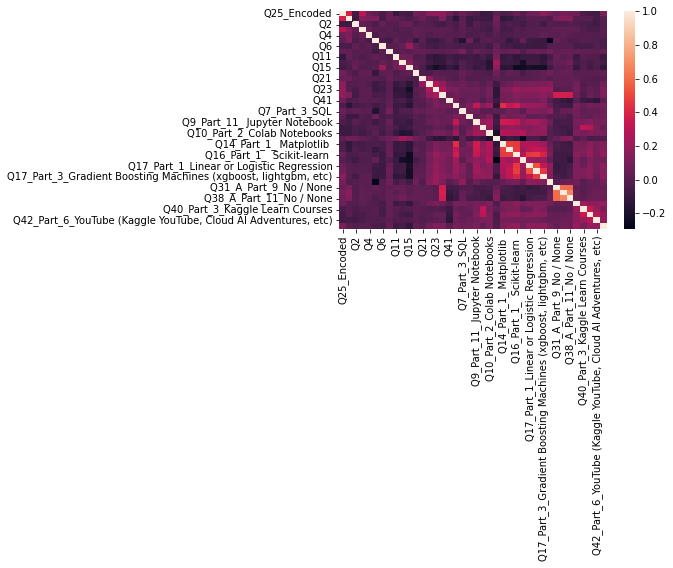

In [27]:
#get correlations of each features in dataset
corr = df_clean.corr()
#plot heat map
sns.heatmap(corr)

From the correlation plot below, we can see that there are some feature with relatively low correlation. Therefore, feature selection is needed to select the features to be used for analysis.

The data is split in to training set and test set.

In [28]:
# train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

Standard scaling is applied on the data by removing the mean and scaling to unit variance to help with the analysis.

In [29]:
# apply standard scaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)

Random forest classifier is applied in order to help with feature importance and feature selection.

In [30]:
# feature selection
rf = RandomForestClassifier(n_estimators=15)
rf.fit(x_train_scaled, y_train)
importances = rf.feature_importances_
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Below is the plot of the order of feature importance after random forest classifier has been applied to the data. 

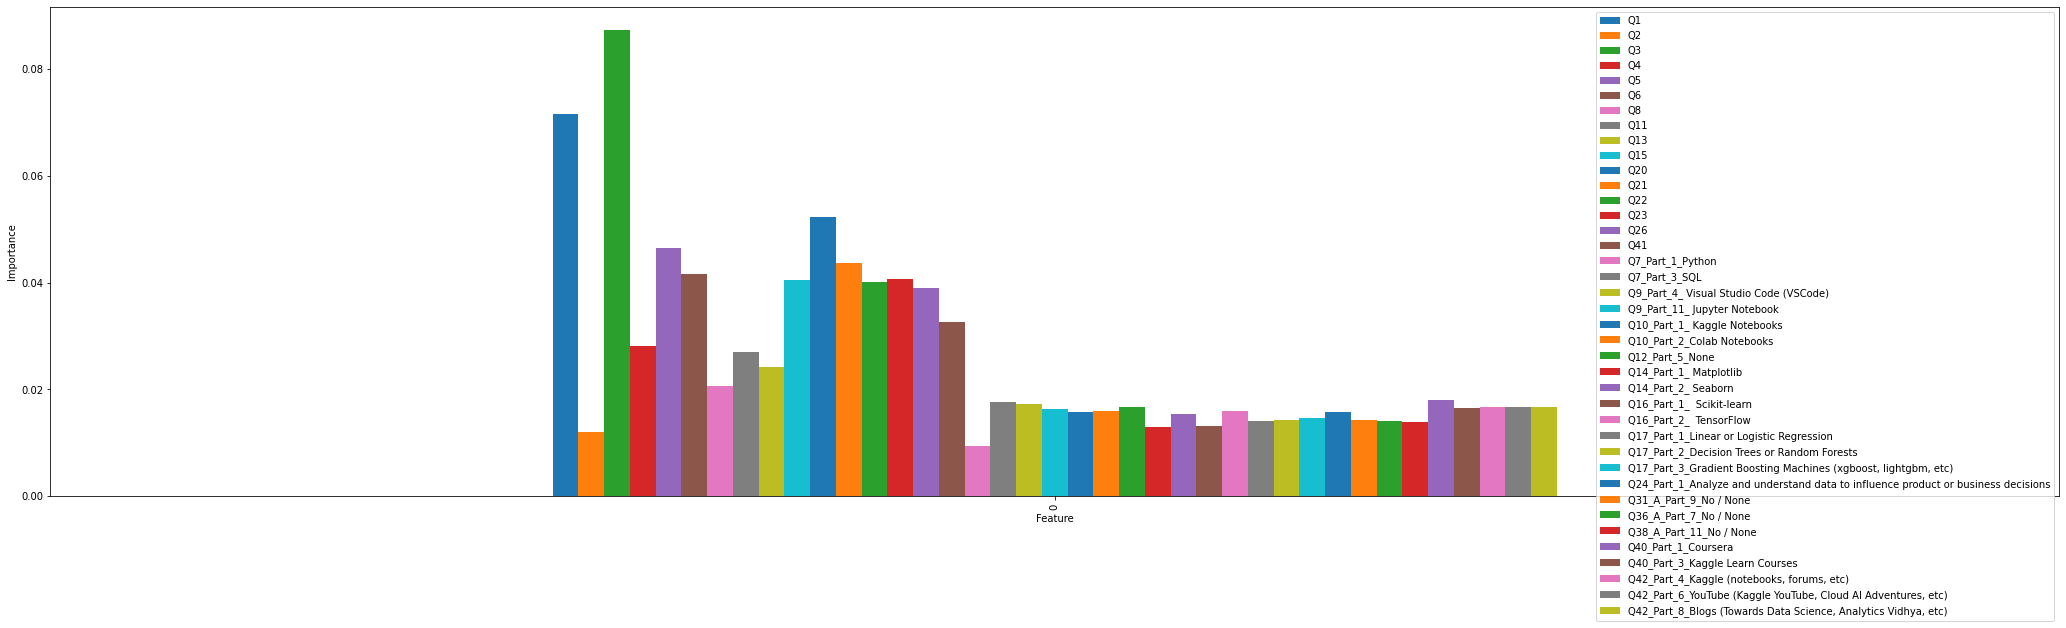

In [31]:
# plot feature importance
df_importance_part2 = pd.DataFrame(data = [importances], columns = df_clean.columns[1:])
df_importance_part2.plot(kind='bar', figsize = [36, 9], xlabel = 'Feature', ylabel = 'Importance')
plt.show()

There are 38 features, in order to select important features, we choose to select the top 15 features, which is about 40% of all the features, because from the plot above, it shows that there are over half of the features have relatively low but similar feature imporatnce, therefore, we only select top 15 from all the features.

Order of the features importance has been printed below. 

In [32]:
df_importance_part2.rank(axis=1, ascending=False)

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,...,"Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)",Q24_Part_1_Analyze and understand data to influence product or business decisions,Q31_A_Part_9_No / None,Q36_A_Part_7_No / None,Q38_A_Part_11_No / None,Q40_Part_1_Coursera,Q40_Part_3_Kaggle Learn Courses,"Q42_Part_4_Kaggle (notebooks, forums, etc)","Q42_Part_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q42_Part_8_Blogs (Towards Data Science, Analytics Vidhya, etc)"
0,2.0,38.0,1.0,12.0,4.0,6.0,15.0,13.0,14.0,8.0,...,30.0,27.0,32.0,33.0,35.0,16.0,23.0,21.0,22.0,20.0


In [33]:
df_importance_part2.rank(axis=1, ascending=False).iloc[:, :20]

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41,Q7_Part_1_Python,Q7_Part_3_SQL,Q9_Part_4_ Visual Studio Code (VSCode),Q9_Part_11_ Jupyter Notebook
0,2.0,38.0,1.0,12.0,4.0,6.0,15.0,13.0,14.0,8.0,3.0,5.0,9.0,7.0,10.0,11.0,39.0,17.0,18.0,24.0


In [34]:
df_importance_part2.rank(axis=1, ascending=False).iloc[:,20:]

,Q10_Part_1_ Kaggle Notebooks,Q10_Part_2_Colab Notebooks,Q12_Part_5_None,Q14_Part_1_ Matplotlib,Q14_Part_2_ Seaborn,Q16_Part_1_ Scikit-learn,Q16_Part_2_ TensorFlow,Q17_Part_1_Linear or Logistic Regression,Q17_Part_2_Decision Trees or Random Forests,"Q17_Part_3_Gradient Boosting Machines (xgboost, lightgbm, etc)",Q24_Part_1_Analyze and understand data to influence product or business decisions,Q31_A_Part_9_No / None,Q36_A_Part_7_No / None,Q38_A_Part_11_No / None,Q40_Part_1_Coursera,Q40_Part_3_Kaggle Learn Courses,"Q42_Part_4_Kaggle (notebooks, forums, etc)","Q42_Part_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q42_Part_8_Blogs (Towards Data Science, Analytics Vidhya, etc)"
0,28.0,26.0,19.0,37.0,29.0,36.0,25.0,34.0,31.0,30.0,27.0,32.0,33.0,35.0,16.0,23.0,21.0,22.0,20.0


From the order above, the top 15 important feature we use for our further analysis would be: Q1,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26 and Q41. Below is the new dataframe for analysis after feature selection.

In [35]:
# dataframe after feature selection
df_feature = df_clean[['Q25_Encoded','Q1','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21','Q22','Q23','Q26','Q41']]
df_feature

,Q25_Encoded,Q1,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41
1,2.0,7.0,23.0,0.0,7.0,4.0,9.0,2.0,0.0,6.0,8.0,4.0,5.0,1.0,4.0,4.0
2,6.0,7.0,24.0,3.0,9.0,2.0,9.0,0.0,3.0,8.0,8.0,2.0,1.0,2.0,0.0,0.0
3,0.0,1.0,41.0,3.0,11.0,0.0,9.0,2.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,1.0
4,3.0,6.0,34.0,1.0,10.0,2.0,9.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0
5,3.0,6.0,23.0,1.0,7.0,5.0,9.0,0.0,3.0,1.0,0.0,4.0,6.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15385,0.0,0.0,23.0,0.0,11.0,0.0,9.0,2.0,3.0,8.0,0.0,0.0,1.0,5.0,3.0,1.0
15386,14.0,9.0,64.0,0.0,9.0,2.0,9.0,3.0,3.0,8.0,0.0,1.0,6.0,4.0,3.0,1.0
15387,0.0,3.0,23.0,0.0,2.0,0.0,9.0,0.0,4.0,0.0,8.0,1.0,4.0,3.0,4.0,4.0
15388,8.0,4.0,51.0,0.0,11.0,4.0,9.0,3.0,0.0,4.0,3.0,1.0,4.0,5.0,3.0,3.0


Training and test dataset have been modified after dropping features that have not been selected after feature selection.

In [36]:
# define x and y
x = df_feature.iloc[:, 1:]
y = df_feature.iloc[:, 0:1]
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10) 
# standard scalar
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

Plot the feature importance of the training data using the selected values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


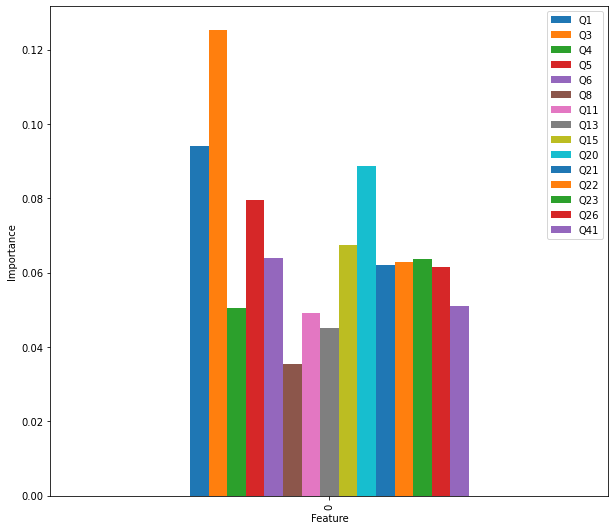

In [37]:
rf = RandomForestClassifier(n_estimators=15)
rf.fit(x_train_scaled, y_train)
importances = rf.feature_importances_
# plot feature importance
df_importance_part2_selected = pd.DataFrame(data = [importances], columns = df_feature.columns[1:])
df_importance_part2_selected.plot(kind='bar', figsize = [10, 9], xlabel = 'Feature', ylabel = 'Importance')
plt.show()

Top 15 important features among all
remaining features have been manually selected based on the order provided by random forest and the plot of the order of these 15 features is shown above. The top 15 features are: Q1, Q3, Q4, Q5, Q6, Q8, Q11, Q13, Q15, Q20, Q21, Q22, Q23, Q26 and Q41.

# 3 Model Implementation

In [38]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In order to implement ordinal logistic regression algorithm on the training data using 10-fold cross-validation, the OrderedModel from statsmodels is used with distribution set to logistic.

stander scaler is applied to the data to standardized features by removing the mean and scaling to unit variance so that it would help with the issue that after encoding, some features have relatively fewer ordering levels while others may contain many levels and the number for them would vary, by using stander scaler it would help with this issue.

In [39]:
# define model
model = OrderedModel(y_train, x_train_scaled, distr='logit')
std_scaler = StandardScaler()

# 10 fold
kfold = KFold(n_splits=10)
kfold.get_n_splits(x_train_scaled)

accuracy = np.zeros(10)
np_idx = 0

# form a dataframe with data and column names
x_train_scaled_df = pd.DataFrame(data = x_train_scaled, columns=x_train.columns)

# cross validation
for train_idx, test_idx in kfold.split(x_train_scaled):
    X_train_cv, X_test_cv = x_train_scaled_df.values[train_idx], x_train_scaled_df.values[test_idx]
    y_train_cv, y_test_cv = y_train.values[train_idx], y_train.values[test_idx]
    
    # fit model
    res_model = model.fit(method='bfgs', disp=False)
    
    # prediction results
    predictions = res_model.predict(exog=X_test_cv)
    pred_choice = predictions.argmax(1)
    pred_choice_df_part3a = pd.DataFrame(data = pred_choice, columns=y_train.columns)
    
    TN = confusion_matrix(y_test_cv, pred_choice)[0][0]
    FP = confusion_matrix(y_test_cv, pred_choice)[0][1]
    FN = confusion_matrix(y_test_cv, pred_choice)[1][0]
    TP = confusion_matrix(y_test_cv, pred_choice)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print(pred_choice_df_part3a.value_counts(normalize=True))
# Reference: https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html
# Reference: https://python.tutorialink.com/ordered-logit-in-python/

Fold 1: Accuracy: 0.836
Fold 2: Accuracy: 0.836
Fold 3: Accuracy: 0.821
Fold 4: Accuracy: 0.839
Fold 5: Accuracy: 0.821
Fold 6: Accuracy: 0.794
Fold 7: Accuracy: 0.858
Fold 8: Accuracy: 0.836
Fold 9: Accuracy: 0.809
Fold 10: Accuracy: 0.824
Average Score: 82.734%(1.678%)
Q25_Encoded
0              0.909938
10             0.081781
12             0.007246
14             0.001035
dtype: float64


Encoded vs salary buckets: '0': '0-9999', '1': '10000-19999', '2': '20000-29999', '3': '30000-39999', '4': '40000-49999', '5': '50000-59999', '6': '60000-69999', '7': '70000-79999', '8': '80000-89999', '9': '90000-99999', '10': '100000-124999', '11': '125000-149999', '12': '150000-199999', '13': '200000-299999', '14': '>300000'

The probability of belonging to each of the salary buckets is displayed as below and since the encoded has used, the salary buckets of each encoded value is presented as above.

Then hyperparameter method is set to another value which is 'nm' to build a new model to compare.

In [40]:
# define model
model = OrderedModel(y_train, x_train_scaled, distr='logit')
std_scaler = StandardScaler()

# 10 fold
kfold = KFold(n_splits=10)
kfold.get_n_splits(x_train_scaled)

accuracy = np.zeros(10)
np_idx = 0

# form a dataframe with data and column names
x_train_scaled_df = pd.DataFrame(data = x_train_scaled, columns=x_train.columns)

# cross validation
for train_idx, test_idx in kfold.split(x_train_scaled):
    X_train_cv, X_test_cv = x_train_scaled_df.values[train_idx], x_train_scaled_df.values[test_idx]
    y_train_cv, y_test_cv = y_train.values[train_idx], y_train.values[test_idx]
    
    # fit model
    res_model = model.fit(method='nm', disp=False)
    
    # prediction results
    predictions = res_model.predict(exog=X_test_cv)
    pred_choice = predictions.argmax(1)
    pred_choice_df_part3b = pd.DataFrame(data = pred_choice, columns=y_train.columns)
    
    TN = confusion_matrix(y_test_cv, pred_choice)[0][0]
    FP = confusion_matrix(y_test_cv, pred_choice)[0][1]
    FN = confusion_matrix(y_test_cv, pred_choice)[1][0]
    TP = confusion_matrix(y_test_cv, pred_choice)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print(pred_choice_df_part3b.value_counts(normalize=True))

Fold 1: Accuracy: 0.835
Fold 2: Accuracy: 0.834
Fold 3: Accuracy: 0.817
Fold 4: Accuracy: 0.84
Fold 5: Accuracy: 0.818
Fold 6: Accuracy: 0.792
Fold 7: Accuracy: 0.853
Fold 8: Accuracy: 0.839
Fold 9: Accuracy: 0.808
Fold 10: Accuracy: 0.825
Average Score: 82.61%(1.704%)
Q25_Encoded
0              1.0
dtype: float64


Encoded vs salary buckets: '0': '0-9999', '1': '10000-19999', '2': '20000-29999', '3': '30000-39999', '4': '40000-49999', '5': '50000-59999', '6': '60000-69999', '7': '70000-79999', '8': '80000-89999', '9': '90000-99999', '10': '100000-124999', '11': '125000-149999', '12': '150000-199999', '13': '200000-299999', '14': '>300000'

The probability of belonging to each of the salary buckets is displayed as below and since the encoded has used, the salary buckets of each encoded value is presented as above.

To compare the performance of model, based on bias-variance trade-off, relatively lower bias is preferred so that it won’t be very
underfitting and relatively lower variance is preferred so that it won’t be very overfitting. Since model accuracy is involved in 10-fold cross-validation, relatively higher accuracy would be preferred because it relates to lower bias, and relatively lower standard deviation is preferred because it relates to lower variance. Therefore, based on the cross-validation accuracy results, when selecting the hyperparameter ‘method’ as ‘bfgs’ would perform better.

# 4 Model Tuning


Hyperparameters in my model are: start_params, method, maxiter, full_output, disp, fargs, callback, retall, skip_hessian and kwargs. Two hyperparameters selected  for model tuning are maxiter and method, and grid search is used to select an optimal model based on accuracy. 

In [41]:
# define model
model = OrderedModel(y_train, x_train_scaled, distr='logit')

# k-fold 
kfold = KFold(n_splits=10)
kfold.get_n_splits(x_train_scaled)

# prepare for grid search
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

# grid search and cross-validation
for maxiter in [1,5,10,20,50,100]:
    for method in ['newton','nm','bfgs','lbfgs','powell','cg','ncg','minimize']:
        
        res_model = model.fit(maxiter=maxiter, method=method, disp=False)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(x_train_scaled):
            X_train_tuning, X_test_tuning = x_train_scaled_df.values[train_idx], x_train_scaled_df.values[test_idx]
            y_train_tuning, y_test_tuning = y_train.values[train_idx], y_train.values[test_idx]

            predictions = res_model.predict(exog=X_test_tuning)
            pred_choice = predictions.argmax(1)

            TN = confusion_matrix(y_test_tuning, pred_choice)[0][0]
            FP = confusion_matrix(y_test_tuning, pred_choice)[0][1]
            FN = confusion_matrix(y_test_tuning, pred_choice)[1][0]
            TP = confusion_matrix(y_test_tuning, pred_choice)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'maxiter':maxiter, 'method':method}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal model uses maxiter={}, and {} method, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['maxiter'],best_params['method'],round(best_accuracy,3),round(best_std,3)))
# References: https://www.statsmodels.org/devel/generated/statsmodels.miscmodels.ordinal_model.OrderedModel.fit.html#statsmodels.miscmodels.ordinal_model.OrderedModel.fit

{'maxiter': 1, 'method': 'lbfgs'}
Best Score: 82.764%(1.675%)

The optimal model uses maxiter=1, and lbfgs method, and has a cross validation score of 82.764% with a standard deviation of 1.675%


The optimal model is listed as the printed result above with 'maxiter': 1 and 'method': 'lbfgs', and feature importance graph of the model is plot to see which features were the most determining in model predictions.

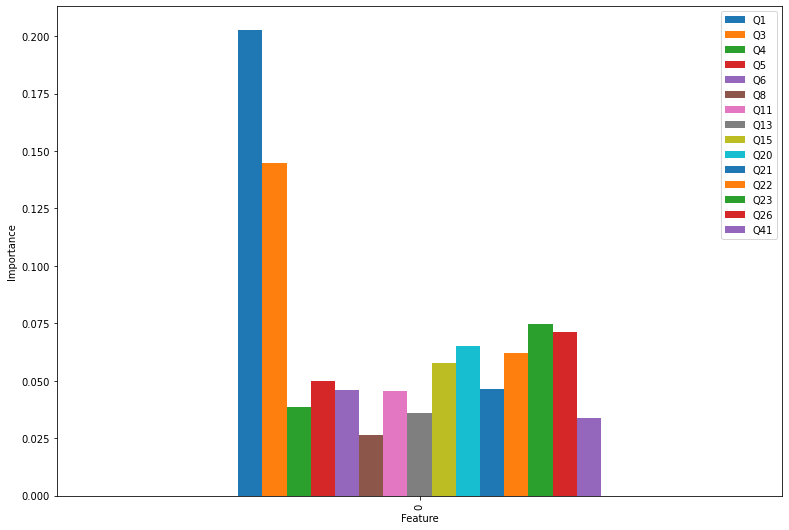

In [42]:
# optimal model
model = OrderedModel(y_train, x_train_scaled, distr='logit')
optimal_res_model = model.fit(maxiter=1, method='lbfgs', disp=False)
predictions = optimal_res_model.predict(exog=x_train_scaled)
pred_choice = predictions.argmax(1)

# plot feature importance to compare with part 2
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scaled, pred_choice)
importance_part4 = model_rf.feature_importances_
df_importance_part4 = pd.DataFrame(data = [importance_part4], columns = df_feature.columns[1:])
df_importance_part4.plot(kind='bar', figsize = [13, 9], xlabel = 'Feature', ylabel = 'Importance')
plt.show()

Compare with the feature importance graph obtained in Section 2: In section 2 plot, the top five important features ranking from the most important to the least is Q3, Q1, Q20, Q5 and Q15, while in section 4 they are Q1, Q3, Q23, Q26 and Q20. Q1, Q3 and Q20 are remained in the top 5 important features, while there are some changes with the other features. With the ordinal logistic model applied, the order of importance of features has some changes. In addition, in section 2, the most important feature Q3 has importance a little bit over 0.12, while in section 4, the most important feature Q1 has importance a little bit over 0.2, and the overall trend of the order of importance is still rather similar to that in section 2. 

# 5 Testing & Discussion

Use optimal model on the test set to see its performance. 

In [43]:
# performance of optimal model on test set
optimal_model = OrderedModel(y_test, x_test_scaled, distr='logit')
optimal_res_model = model.fit(maxiter=1, method='lbfgs', disp=False)
predictions_test = optimal_res_model.predict(exog=x_test_scaled)
pred_choice_test = predictions_test.argmax(1)
pred_choice_df_part5 = pd.DataFrame(data = pred_choice_test, columns=y_test.columns)
TN = confusion_matrix(y_test, pred_choice_test)[0][0]
FP = confusion_matrix(y_test, pred_choice_test)[0][1]
FN = confusion_matrix(y_test, pred_choice_test)[1][0]
TP = confusion_matrix(y_test, pred_choice_test)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)
print ("This model got an accuracy of {}% on the test set".format(round(ACC*100,2)))  
print(pred_choice_df_part5.value_counts(normalize=True)) 

This model got an accuracy of 79.84% on the test set
Q25_Encoded
0              0.927971
12             0.038429
10             0.022050
14             0.011550
dtype: float64


Compared with the 82.764% accuracy on the training set, the accuracy on the test set is a little bit lower but reasonable. The optimal model performs a quite proper fitting with relatively similar accuracy on the training and test set, which is not overfitting or underfitting.

If more data is provided, the accuracy of the model might be able to increase due to a better model with more valid data. If much deeper model tuning has been performed based on more hyperparameters, it might increase the accuracy of the model. And to perform a different algorithm other than the algorithm used in this study would help to increase the accuracy.

Plot the distribution of true target variable values and their predictions on both the training set and test set.

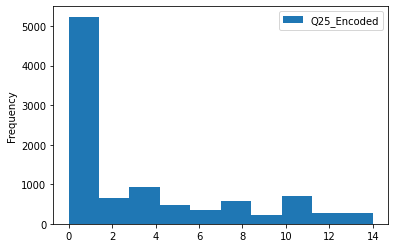

In [44]:
# distribution of true target variable values on training set
y_train.plot.hist()

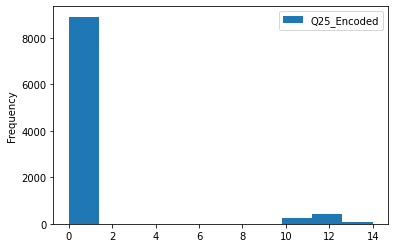

In [45]:
# distribution of predicted target variable values on training set
pred_choice_df = pd.DataFrame(data = pred_choice, columns=y_train.columns)
pred_choice_df.plot.hist()

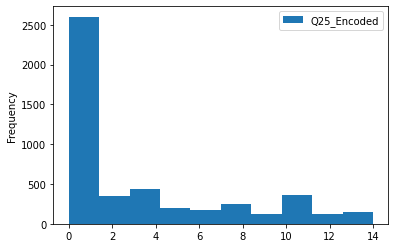

In [46]:
# distribution of true target variable values on test set
y_test.plot.hist()

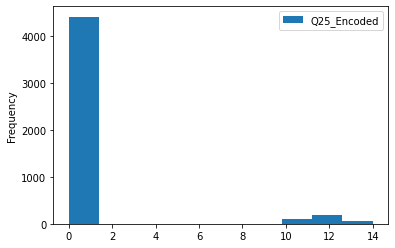

In [47]:
# distribution of predicted target variable values on test set
pred_choice_test_df = pd.DataFrame(data = pred_choice_test, columns=y_test.columns)
pred_choice_test_df.plot.hist()

From the above plots, it shows that my trained model would prefer to highlight the difference between salary buckets with very high frequency and very low frequency. For example, from 0-1 encoded level which is 0-9999 and 10000-19999 dollars, these level range have the highest number of data points on true target variable, while in prediction, the number becomes even higher. However, some class with small number of data points in true target become less in prediction.